In [10]:
from fish.image.zds import ZDS
from fish.image.alignment import estimate_translation
from skimage.transform import downscale_local_mean

In [7]:
dset = ZDS(r'F:/davis/20180321/5dpf_ec43xcy331xcy171_f1_opto_1_20180321_115401/')

In [83]:
%%time
reg_crop = (slice(0,None), slice(200, 250))
moving = downscale_local_mean(dset[-1].max(0)[reg_crop], (1,1))
fixed = downscale_local_mean(dset[0].max(0)[reg_crop], (1,1))
tx = estimate_translation(moving, fixed)

Wall time: 1.79 s


In [84]:
tx.affine

array([[ 1.00000000e+00,  0.00000000e+00, -5.54724362e-04],
       [ 0.00000000e+00,  1.00000000e+00,  2.23450169e-02],
       [ 0.00000000e+00,  0.00000000e+00,  1.00000000e+00]])

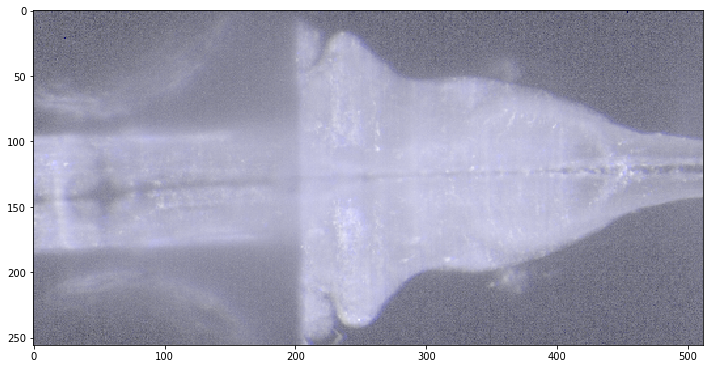

In [61]:
%matplotlib inline
from matplotlib.cm import Reds, Blues
from skimage.exposure import rescale_intensity
from skimage.color import gray2rgb
import numpy as np
moving_c = gray2rgb(rescale_intensity(moving, out_range=(0,1)), alpha=1) * np.array([1,1,1,1])
fixed_c = gray2rgb(rescale_intensity(fixed, out_range=(0,1)), alpha=1) * np.array([0,0,1,1])
fig, axs = plt.subplots(figsize=(12,12))
axs.imshow((moving_c + fixed_c).clip(0,1) ** .2)
plt.show()